In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib
import ast
from langdetect import detect
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
lst = os.listdir("d/")
len(lst)

98

In [3]:
#Creating one large DF
df = pd.read_csv('d/'+lst[0])
df = df.head(1)
for elem in lst:
    try:
        print(elem)
        dfn = pd.read_csv('d/'+elem, dtype=str)
        frames = [df, dfn]
        df = pd.concat(frames)
    except:
        "ParserError"

2018-11-27 06:30:31.046187.csv
2018-11-27 14:30:33.894260.csv
2018-11-26 22:30:34.571186.csv
2018-11-25 23:30:33.063000.csv
2018-11-27 18:00:33.189151.csv
2018-11-25 13:53:45.236754.csv
2018-11-26 08:30:31.625740.csv
2018-11-26 11:00:31.993379.csv
2018-11-27 04:00:32.245627.csv
2018-11-26 05:30:31.883491.csv
2018-11-27 07:30:31.275437.csv
2018-11-26 04:00:32.732102.csv
2018-11-26 19:30:33.051060.csv
2018-11-26 06:00:31.497762.csv
2018-11-25 22:30:34.160286.csv
2018-11-27 05:00:32.658155.csv
2018-11-25 22:00:35.080963.csv
2018-11-27 09:30:30.115834.csv
2018-11-26 08:00:31.068246.csv
.DS_Store
2018-11-26 18:00:36.645663.csv
2018-11-26 13:30:32.685507.csv
2018-11-25 14:30:14.109423.csv
2018-11-27 11:00:32.426632.csv
2018-11-26 07:30:30.731772.csv
2018-11-25 18:00:17.600991.csv
2018-11-26 03:30:31.363652.csv
2018-11-27 05:30:31.965503.csv
2018-11-27 14:00:31.472355.csv
2018-11-27 11:30:30.940238.csv
2018-11-27 02:00:32.821754.csv
2018-11-25 20:00:33.101249.csv
2018-11-27 10:30:30.937979.cs

In [4]:
del df['Unnamed: 0']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 436284 entries, 0 to 5000
Data columns (total 7 columns):
Date         436275 non-null object
Descr        362283 non-null object
Full Text    436236 non-null object
Geo          9 non-null object
ID           436227 non-null object
Place        2279 non-null object
User         436188 non-null object
dtypes: object(7)
memory usage: 26.6+ MB


In [6]:
df = df.drop_duplicates()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31419 entries, 0 to 4826
Data columns (total 7 columns):
Date         31418 non-null object
Descr        26101 non-null object
Full Text    31416 non-null object
Geo          1 non-null object
ID           31415 non-null object
Place        2262 non-null object
User         31413 non-null object
dtypes: object(7)
memory usage: 1.9+ MB


In [8]:
def removeRT(elem):
    try:
        if "RT " in elem:
            return True
        else:
            return False
    except:
        "TypeError:"
        return "No Result"
df['Retweet'] = df['Full Text'].apply(removeRT)
originaltweets = df[df['Retweet']==False]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31419 entries, 0 to 4826
Data columns (total 8 columns):
Date         31418 non-null object
Descr        26101 non-null object
Full Text    31416 non-null object
Geo          1 non-null object
ID           31415 non-null object
Place        2262 non-null object
User         31413 non-null object
Retweet      31419 non-null object
dtypes: object(8)
memory usage: 2.2+ MB


In [10]:
df['User'].value_counts().count()

14715

In [11]:
#How many original tweets
originaltweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6333 entries, 29 to 4826
Data columns (total 8 columns):
Date         6333 non-null object
Descr        5451 non-null object
Full Text    6333 non-null object
Geo          0 non-null object
ID           6332 non-null object
Place        2262 non-null object
User         6330 non-null object
Retweet      6333 non-null object
dtypes: object(8)
memory usage: 445.3+ KB


In [12]:
originaltweets['User'].value_counts().count()

1860

In [13]:
#Most active Tweeter:
pd.options.display.max_rows = 500
pd.DataFrame(originaltweets['User'].value_counts().head(10))

,User
RogerTh71142375,613
marcelacanterov,385
Dietmar_Bauer,80
Volker_Herres,80
Ojo_Publico,63
rebeccacoombes,61
EVEPIE,60
sextaNoticias,57
antonioj_campos,50
emmafriedmann,46


In [14]:
#finding medtech accounts
tc = pd.DataFrame(originaltweets['User'].value_counts())
tc = tc.reset_index()
def findmedtech(elem):
    elem = elem.lower()
    if ("med" or "tech" or "medtech" or "med-tech") in elem:
        return True
    else:
        return False
tc['medtech'] = tc['index'].apply(findmedtech)
tc[tc['medtech']==True].head(10)

,index,User,medtech
75,BVMed,15,True
108,Daraj_media,9,True
109,MedtechAmanda,9,True
149,AdvaMedUpdate,6,True
159,nisusmedical,6,True
169,Z_Medical,6,True
177,MedicalTopJobs,5,True
181,TranspariMED,5,True
190,dBmedico,5,True
196,diariomedico,5,True


In [15]:
#Languagse Distribution
def lang(elem):
    try:
        l = detect(elem)
        return l
    except:
        'LangDetectException:'
        return elem
df['Language'] = df['Full Text'].apply(lang)
lg = pd.DataFrame(df['Language'].value_counts())
lg = lg.reset_index()
langs = pd.read_html('https://en.wikipedia.org/wiki/List_of_ISO_639-1_codes')
langs = langs[1][1:]
final = lg.merge(langs, how='left', left_on='index', right_on=4)
def findhttps(elem):
    if type(elem) == int:
        return True
    elif ("https:" or "10668") in elem:
        return True
    else:
        return False
final['false language'] = final['index'].apply(findhttps)
final = final[final['false language']==False]
final[['index', 'Language', 2,3]].copy()

,index,Language,2,3
0,en,11690,English,English
1,es,6197,"Spanish, Castilian",Español
2,fr,5124,French,"français, langue française"
3,de,3824,German,Deutsch
4,it,1280,Italian,Italiano
5,nl,992,"Dutch, Flemish","Nederlands, Vlaams"
6,pt,966,Portuguese,Português
7,ko,729,Korean,한국어
8,sl,165,Slovene,"Slovenski Jezik, Slovenščina"
9,ca,109,"Catalan, Valencian","català, valencià"


In [16]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 63
Data columns (total 12 columns):
index             36 non-null object
Language          36 non-null int64
0                 0 non-null float64
1                 34 non-null object
2                 34 non-null object
3                 34 non-null object
4                 34 non-null object
5                 34 non-null object
6                 34 non-null object
7                 34 non-null object
8                 10 non-null object
false language    36 non-null bool
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 3.4+ KB


In [19]:
## def findmistakes(elem): 
#in rare cases the Tweets aren't imported properly
def findmistakes(elem): 
    try:
        if len(elem) > 30:
            return True
        else:
            return False
    except:
        "TypeError:"
        return False
df['Date Mistakes'] = df['Date'].apply(findmistakes)
df[df['Date Mistakes']==True]

,Date,Descr,Full Text,Geo,ID,Place,User,Retweet,Language,Date Mistakes
2951,RT @ICIJorg: We're also publishing a database ...,NaN,1066856596792205317,NaN,MambangStory,NaN,NaN,False,1066856596792205317,True
4895,The Implant Files investigation reveals shocki...,NaN,1066822612884643840,NaN,VeliUotila,NaN,NaN,False,1066822612884643840,True


In [20]:
df = df[df['Date Mistakes']==False]

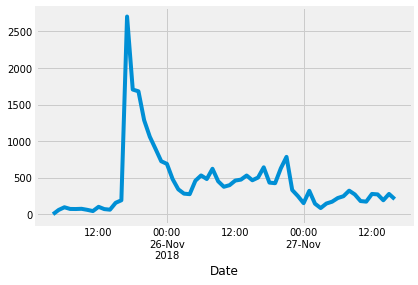

In [21]:
#Plot UTC time
df.index = pd.to_datetime(df['Date'], format='%a %b %d %H:%M:%S +0000 %Y')

df.resample('H')['Descr'].count().plot()

In [22]:
pd.DataFrame(df.resample('H')['Descr'].count())

,Descr
Date,
2018-11-25 04:00:00,1
2018-11-25 05:00:00,60
2018-11-25 06:00:00,96
2018-11-25 07:00:00,73
2018-11-25 08:00:00,72
2018-11-25 09:00:00,75
2018-11-25 10:00:00,61
2018-11-25 11:00:00,44
2018-11-25 12:00:00,102


In [24]:
df.to_csv('20181125_1400-20181127_1800tweets.csv')

In [ ]:
#Welsh, Tamil, Hindi, Kannada and Tagalog. Tweets